In [1]:
using Roots

`steady` is a function to determinte wheather a fixed point is steady or not.

In [2]:
function steady(f,x0)
    stability = []
    for x in x0
        if f(x+1e-3)<0 && f(x-1e-3)>0
            push!(stability,"stable")
        else
            push!(stability,"unstable")
        end
    end
    return stability
end

steady (generic function with 1 method)

Set up parameters and functions in the assigned model. Note that $dR/dt = f(R,S) = f⁺(R,S) - f⁻(R,S)$.

In [3]:
k0 = 0.4
k1 = 0.01
k2 = k3 = 1
k4 = 0.2
J3 = J4 = 0.05

G(u,v,J,K) = 2u*K/(v - u + v*J + u*K + 
√((v - u + v*J + u*K)^2 - 4(v-u)*u*K))
Ep(R) = G(k3*R, k4, J3, J4) 
f⁺(R,S) = k0*Ep(R) + k1*S
f⁻(R,S) = k2*R
f(R,S) = f⁺(R,S) - f⁻(R,S)

f (generic function with 1 method)

Plotting. Note that there may be only one stable fixed point when S=10. The existence of the other 2 fixed points(one stable and one unstable) may be the result of numerical errors.

In [4]:
using Gadfly,DataFrames
for S = [0,8,10.03,11]
    R0 = fzeros(R->f(R,S),0.0,1.0)
    stability = steady(R->f(R,S),R0)
    x = 0:0.01:1
    df = vcat(DataFrame(R=x,v= f⁺.(x,S),legend="+ rate"),
    DataFrame(R=x,v= f⁻.(x,S),legend="- rate"))
    plot(layer(df,x=:R,y=:v,color=:legend,Geom.line),
    layer(x=R0,y=f⁺.(R0,S),color=stability,Geom.point,
    Theme(default_color=colorant"red")),
    Guide.title("S=$S")) |> display
end
    

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 R 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 -1.00 
 -0.95 
 -0.90 
 -0.85 
 -0.80 
 -0.75 
 -0.70 
 -0.65 
 -0.60 
 -0.55 
 -0.50 
 -0.45 
 -0.40 
 -0.35 
 -0.30 
 -0.25 
 -0.20 
 -0.15 
 -0.10 
 -0.05 
 0.00 
 0.05 
 0.10 
 0.15 
 0.20 
 0.25 
 0.30 
 0.35 
 0.40 
 0.45 
 0.50 
 0.55 
 0.60 
 0.65 
 0.70 
 0.75 
 0.80 
 0.85 
 0.90 
 0.95 
 1.00 
 1.05 
 1.10 
 1.15 
 1.20 
 1.25 
 1.30 
 1.35 
 1.40 
 1.45 
 1.50 
 1.55 
 1.60 
 1.65 
 1.70 
 1.75 
 1.80 
 1.85 
 1.90 
 1.95 
 2.00 
 -1 
 0 
 1 
 2 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 
 
 
 + rate 
 - rate 
 stable 
 unstable 
 
 
 
 
 
 
 
 
 legend 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M18.89,78.72 L 19.9 78.65 20.92 78.58 21.93 78.49 22.94 78.4 23.96 78.3 24.97 78.19 25.98 78.06 27 77.9 28.01 77.73 29.02 77.52 30.04 77.27 31.05 76.97 32.06 76.59 33.08 76.11 34.09 75.48 35.1 74.63 36.12 73.43 37.13 71.64 38.14 68.99 39.15 65.49 40.17 62.15 41.18 59.76 42.19 58.18 43.21 57.11 44.22 56.36 45.23 55.8 46.25 55.37 47.26 55.04 48.27 54.77 49.29 54.55 50.3 54.36 51.31 54.2 52.33 54.06 53.34 53.95 54.35 53.84 55.37 53.75 56.38 53.67 57.39 53.6 58.41 53.53 59.42 53.47 60.43 53.42 61.45 53.37 62.46 53.32 63.47 53.28 64.49 53.24 65.5 53.21 66.51 53.17 67.53 53.14 68.54 53.11 69.55 53.09 70.57 53.06 71.58 53.04 72.59 53.01 73.61 52.99 74.62 52.97 75.63 52.95 76.65 52.94 77.66 52.92 78.67 52.9 79.68 52.89 80.7 52.87 81.71 52.86 82.72 52.85 83.74 52.83 84.75 52.82 85.76 52.81 86.78 52.8 87.79 52.79 88.8 52.78 89.82 52.77 90.83 52.76 91.84 52.75 92.86 52.74 93.87 52.73 94.88 52.72 95.9 52.72 96.91 52.71 97.92 52.7 98.94 52.69 99.95 52.69 100.96 52.68 101.98 52.67 102.99 52.67 104 52.66 105.02 52.66 106.03 52.65 107.04 52.64 108.06 52.64 109.07 52.63 110.08 52.63 111.1 52.62 112.11 52.62 113.12 52.61 114.14 52.61 115.15 52.6 116.16 52.6 117.17 52.6 118.19 52.59 119.2 52.59 120.21 52.58" id="img-16d181e8-241" class="geometry color_+_rate" stroke="#00BFFF"/>
 <path fill="none" d="M18.89,78.72 L 19.9 78.05 20.92 77.39 21.93 76.73 22.94 76.07 23.96 75.41 24.97 74.75 25.98 74.09 27 73.43 28.01 72.77 29.02 72.1 30.04 71.44 31.05 70.78 32.06 70.12 33.08 69.46 34.09 68.8 35.1 68.14 36.12 67.48 37.13 66.82 38.14 66.16 39.15 65.49 40.17 64.83 41.18 64.17 42.19 63.51 43.21 62.85 44.22 62.19 45.23 61.53 46.25 60.87 47.26 60.21 48.27 59.55 49.29 58.88 50.3 58.22 51.31 57.56 52.33 56.9 53.34 56.24 54.35 55.58 55.37 54.92 56.38 54.26 57.39 53.6 58.41 52.93 59.42 52.27 60.43 51.61 61.45 50.95 62.46 50.29 63.47 49.63 64.49 48.97 65.5 48.31 66.51 47.65 67.53 46.99 68.54 46.32 69.55 45.66 70.57 45 71.58 44.34 72.59 43.68 73.61 43.02 74.62 42.36 75.63 41.7 76.65 41.04 77.66 40.38 78.67 39.71 79.68 39.05 80.7 38.39 81.71 37.73 82.72 37.07 83.74 36.41 84.75 35.75 85.76 35.09 86.78 34.43 87.79 33.76 88.8 33.1 89.82 32.44 90.83 31.78 91.84 31.12 92.86 30.46 93.87 29.8 94.88 29.14 95.9 28.48 96.91 27.82 97.92 27.15 98.94 26.49 99.95 25.83 100.96 25.17 101.98 24.51 102.99 23.85 104 23.19 105.02 22.53 106.03 21.87 107.04 21.21 108.06 20.54 109.07 19.88 110.08 19.22 111.1 18.56 112.11 17.9 113.12 17.24 114.14 16.58 115.15 15.92 116.16 15.26 117.17 14.59 118.19 13.93 119.2 13.27 120.21 12.61" id="img-16d181e8-242" class="geometry color_-_rate" stroke="#D4CA3A"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 R 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 -1.00 
 -0.95 
 -0.90 
 -0.85 
 -0.80 
 -0.75 
 -0.70 
 -0.65 
 -0.60 
 -0.55 
 -0.50 
 -0.45 
 -0.40 
 -0.35 
 -0.30 
 -0.25 
 -0.20 
 -0.15 
 -0.10 
 -0.05 
 0.00 
 0.05 
 0.10 
 0.15 
 0.20 
 0.25 
 0.30 
 0.35 
 0.40 
 0.45 
 0.50 
 0.55 
 0.60 
 0.65 
 0.70 
 0.75 
 0.80 
 0.85 
 0.90 
 0.95 
 1.00 
 1.05 
 1.10 
 1.15 
 1.20 
 1.25 
 1.30 
 1.35 
 1.40 
 1.45 
 1.50 
 1.55 
 1.60 
 1.65 
 1.70 
 1.75 
 1.80 
 1.85 
 1.90 
 1.95 
 2.00 
 -1 
 0 
 1 
 2 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 
 
 
 + rate 
 - rate 
 stable 
 unstable 
 
 
 
 
 
 
 
 
 legend 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M18.89,73.43 L 19.9 73.36 20.92 73.29 21.93 73.21 22.94 73.12 23.96 73.01 24.97 72.9 25.98 72.77 27 72.62 28.01 72.44 29.02 72.23 30.04 71.98 31.05 71.68 32.06 71.3 33.08 70.82 34.09 70.2 35.1 69.35 36.12 68.14 37.13 66.35 38.14 63.7 39.15 60.21 40.17 56.86 41.18 54.47 42.19 52.89 43.21 51.82 44.22 51.07 45.23 50.51 46.25 50.09 47.26 49.75 48.27 49.48 49.29 49.26 50.3 49.07 51.31 48.91 52.33 48.78 53.34 48.66 54.35 48.55 55.37 48.46 56.38 48.38 57.39 48.31 58.41 48.24 59.42 48.18 60.43 48.13 61.45 48.08 62.46 48.03 63.47 47.99 64.49 47.95 65.5 47.92 66.51 47.88 67.53 47.85 68.54 47.82 69.55 47.8 70.57 47.77 71.58 47.75 72.59 47.73 73.61 47.7 74.62 47.68 75.63 47.67 76.65 47.65 77.66 47.63 78.67 47.61 79.68 47.6 80.7 47.58 81.71 47.57 82.72 47.56 83.74 47.54 84.75 47.53 85.76 47.52 86.78 47.51 87.79 47.5 88.8 47.49 89.82 47.48 90.83 47.47 91.84 47.46 92.86 47.45 93.87 47.44 94.88 47.43 95.9 47.43 96.91 47.42 97.92 47.41 98.94 47.41 99.95 47.4 100.96 47.39 101.98 47.39 102.99 47.38 104 47.37 105.02 47.37 106.03 47.36 107.04 47.36 108.06 47.35 109.07 47.35 110.08 47.34 111.1 47.34 112.11 47.33 113.12 47.33 114.14 47.32 115.15 47.32 116.16 47.31 117.17 47.31 118.19 47.3 119.2 47.3 120.21 47.3" id="img-0b546422-241" class="geometry color_+_rate" stroke="#00BFFF"/>
 <path fill="none" d="M18.89,78.72 L 19.9 78.05 20.92 77.39 21.93 76.73 22.94 76.07 23.96 75.41 24.97 74.75 25.98 74.09 27 73.43 28.01 72.77 29.02 72.1 30.04 71.44 31.05 70.78 32.06 70.12 33.08 69.46 34.09 68.8 35.1 68.14 36.12 67.48 37.13 66.82 38.14 66.16 39.15 65.49 40.17 64.83 41.18 64.17 42.19 63.51 43.21 62.85 44.22 62.19 45.23 61.53 46.25 60.87 47.26 60.21 48.27 59.55 49.29 58.88 50.3 58.22 51.31 57.56 52.33 56.9 53.34 56.24 54.35 55.58 55.37 54.92 56.38 54.26 57.39 53.6 58.41 52.93 59.42 52.27 60.43 51.61 61.45 50.95 62.46 50.29 63.47 49.63 64.49 48.97 65.5 48.31 66.51 47.65 67.53 46.99 68.54 46.32 69.55 45.66 70.57 45 71.58 44.34 72.59 43.68 73.61 43.02 74.62 42.36 75.63 41.7 76.65 41.04 77.66 40.38 78.67 39.71 79.68 39.05 80.7 38.39 81.71 37.73 82.72 37.07 83.74 36.41 84.75 35.75 85.76 35.09 86.78 34.43 87.79 33.76 88.8 33.1 89.82 32.44 90.83 31.78 91.84 31.12 92.86 30.46 93.87 29.8 94.88 29.14 95.9 28.48 96.91 27.82 97.92 27.15 98.94 26.49 99.95 25.83 100.96 25.17 101.98 24.51 102.99 23.85 104 23.19 105.02 22.53 106.03 21.87 107.04 21.21 108.06 20.54 109.07 19.88 110.08 19.22 111.1 18.56 112.11 17.9 113.12 17.24 114.14 16.58 115.15 15.92 116.16 15.26 117.17 14.59 118.19 13.93 119.2 13.27 120.21 12.61" id="img-0b546422-242" class="geometry color_-_rate" stroke="#D4CA3A"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 R 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 -1.00 
 -0.95 
 -0.90 
 -0.85 
 -0.80 
 -0.75 
 -0.70 
 -0.65 
 -0.60 
 -0.55 
 -0.50 
 -0.45 
 -0.40 
 -0.35 
 -0.30 
 -0.25 
 -0.20 
 -0.15 
 -0.10 
 -0.05 
 0.00 
 0.05 
 0.10 
 0.15 
 0.20 
 0.25 
 0.30 
 0.35 
 0.40 
 0.45 
 0.50 
 0.55 
 0.60 
 0.65 
 0.70 
 0.75 
 0.80 
 0.85 
 0.90 
 0.95 
 1.00 
 1.05 
 1.10 
 1.15 
 1.20 
 1.25 
 1.30 
 1.35 
 1.40 
 1.45 
 1.50 
 1.55 
 1.60 
 1.65 
 1.70 
 1.75 
 1.80 
 1.85 
 1.90 
 1.95 
 2.00 
 -1 
 0 
 1 
 2 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 
 
 
 + rate 
 - rate 
 stable 
 unstable 
 
 
 
 
 
 
 
 
 legend 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M18.89,72.08 L 19.9 72.02 20.92 71.95 21.93 71.86 22.94 71.77 23.96 71.67 24.97 71.56 25.98 71.43 27 71.27 28.01 71.1 29.02 70.89 30.04 70.64 31.05 70.34 32.06 69.96 33.08 69.48 34.09 68.85 35.1 68 36.12 66.8 37.13 65.01 38.14 62.36 39.15 58.86 40.17 55.52 41.18 53.13 42.19 51.55 43.21 50.48 44.22 49.73 45.23 49.17 46.25 48.74 47.26 48.41 48.27 48.14 49.29 47.91 50.3 47.73 51.31 47.57 52.33 47.43 53.34 47.32 54.35 47.21 55.37 47.12 56.38 47.04 57.39 46.97 58.41 46.9 59.42 46.84 60.43 46.79 61.45 46.74 62.46 46.69 63.47 46.65 64.49 46.61 65.5 46.58 66.51 46.54 67.53 46.51 68.54 46.48 69.55 46.46 70.57 46.43 71.58 46.41 72.59 46.38 73.61 46.36 74.62 46.34 75.63 46.32 76.65 46.31 77.66 46.29 78.67 46.27 79.68 46.26 80.7 46.24 81.71 46.23 82.72 46.22 83.74 46.2 84.75 46.19 85.76 46.18 86.78 46.17 87.79 46.16 88.8 46.15 89.82 46.14 90.83 46.13 91.84 46.12 92.86 46.11 93.87 46.1 94.88 46.09 95.9 46.09 96.91 46.08 97.92 46.07 98.94 46.06 99.95 46.06 100.96 46.05 101.98 46.04 102.99 46.04 104 46.03 105.02 46.02 106.03 46.02 107.04 46.01 108.06 46.01 109.07 46 110.08 46 111.1 45.99 112.11 45.99 113.12 45.98 114.14 45.98 115.15 45.97 116.16 45.97 117.17 45.97 118.19 45.96 119.2 45.96 120.21 45.95" id="img-6aa92100-241" class="geometry color_+_rate" stroke="#00BFFF"/>
 <path fill="none" d="M18.89,78.72 L 19.9 78.05 20.92 77.39 21.93 76.73 22.94 76.07 23.96 75.41 24.97 74.75 25.98 74.09 27 73.43 28.01 72.77 29.02 72.1 30.04 71.44 31.05 70.78 32.06 70.12 33.08 69.46 34.09 68.8 35.1 68.14 36.12 67.48 37.13 66.82 38.14 66.16 39.15 65.49 40.17 64.83 41.18 64.17 42.19 63.51 43.21 62.85 44.22 62.19 45.23 61.53 46.25 60.87 47.26 60.21 48.27 59.55 49.29 58.88 50.3 58.22 51.31 57.56 52.33 56.9 53.34 56.24 54.35 55.58 55.37 54.92 56.38 54.26 57.39 53.6 58.41 52.93 59.42 52.27 60.43 51.61 61.45 50.95 62.46 50.29 63.47 49.63 64.49 48.97 65.5 48.31 66.51 47.65 67.53 46.99 68.54 46.32 69.55 45.66 70.57 45 71.58 44.34 72.59 43.68 73.61 43.02 74.62 42.36 75.63 41.7 76.65 41.04 77.66 40.38 78.67 39.71 79.68 39.05 80.7 38.39 81.71 37.73 82.72 37.07 83.74 36.41 84.75 35.75 85.76 35.09 86.78 34.43 87.79 33.76 88.8 33.1 89.82 32.44 90.83 31.78 91.84 31.12 92.86 30.46 93.87 29.8 94.88 29.14 95.9 28.48 96.91 27.82 97.92 27.15 98.94 26.49 99.95 25.83 100.96 25.17 101.98 24.51 102.99 23.85 104 23.19 105.02 22.53 106.03 21.87 107.04 21.21 108.06 20.54 109.07 19.88 110.08 19.22 111.1 18.56 112.11 17.9 113.12 17.24 114.14 16.58 115.15 15.92 116.16 15.26 117.17 14.59 118.19 13.93 119.2 13.27 120.21 12.61" id="img-6aa92100-242" class="geometry color_-_rate" stroke="#D4CA3A"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 R 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 -1.00 
 -0.95 
 -0.90 
 -0.85 
 -0.80 
 -0.75 
 -0.70 
 -0.65 
 -0.60 
 -0.55 
 -0.50 
 -0.45 
 -0.40 
 -0.35 
 -0.30 
 -0.25 
 -0.20 
 -0.15 
 -0.10 
 -0.05 
 0.00 
 0.05 
 0.10 
 0.15 
 0.20 
 0.25 
 0.30 
 0.35 
 0.40 
 0.45 
 0.50 
 0.55 
 0.60 
 0.65 
 0.70 
 0.75 
 0.80 
 0.85 
 0.90 
 0.95 
 1.00 
 1.05 
 1.10 
 1.15 
 1.20 
 1.25 
 1.30 
 1.35 
 1.40 
 1.45 
 1.50 
 1.55 
 1.60 
 1.65 
 1.70 
 1.75 
 1.80 
 1.85 
 1.90 
 1.95 
 2.00 
 -1 
 0 
 1 
 2 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 
 
 
 + rate 
 - rate 
 stable 
 
 
 
 
 
 
 
 legend 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M18.89,71.44 L 19.93 71.38 20.97 71.3 22.01 71.22 23.06 71.13 24.1 71.03 25.14 70.92 26.18 70.78 27.22 70.63 28.26 70.46 29.31 70.25 30.35 70 31.39 69.69 32.43 69.32 33.47 68.84 34.51 68.21 35.56 67.36 36.6 66.16 37.64 64.37 38.68 61.72 39.72 58.22 40.76 54.88 41.81 52.48 42.85 50.9 43.89 49.84 44.93 49.08 45.97 48.53 47.01 48.1 48.06 47.77 49.1 47.5 50.14 47.27 51.18 47.09 52.22 46.93 53.26 46.79 54.31 46.67 55.35 46.57 56.39 46.48 57.43 46.4 58.47 46.32 59.51 46.26 60.56 46.2 61.6 46.14 62.64 46.1 63.68 46.05 64.72 46.01 65.76 45.97 66.81 45.93 67.85 45.9 68.89 45.87 69.93 45.84 70.97 45.81 72.01 45.79 73.06 45.76 74.1 45.74 75.14 45.72 76.18 45.7 77.22 45.68 78.26 45.66 79.31 45.65 80.35 45.63 81.39 45.62 82.43 45.6 83.47 45.59 84.51 45.57 85.56 45.56 86.6 45.55 87.64 45.54 88.68 45.53 89.72 45.52 90.76 45.51 91.81 45.5 92.85 45.49 93.89 45.48 94.93 45.47 95.97 45.46 97.01 45.45 98.06 45.44 99.1 45.44 100.14 45.43 101.18 45.42 102.22 45.42 103.26 45.41 104.31 45.4 105.35 45.4 106.39 45.39 107.43 45.38 108.47 45.38 109.51 45.37 110.55 45.37 111.6 45.36 112.64 45.36 113.68 45.35 114.72 45.35 115.76 45.34 116.8 45.34 117.85 45.33 118.89 45.33 119.93 45.33 120.97 45.32 122.01 45.32 123.05 45.31" id="img-b5585e80-237" class="geometry color_+_rate" stroke="#00BFFF"/>
 <path fill="none" d="M18.89,78.72 L 19.93 78.05 20.97 77.39 22.01 76.73 23.06 76.07 24.1 75.41 25.14 74.75 26.18 74.09 27.22 73.43 28.26 72.77 29.31 72.1 30.35 71.44 31.39 70.78 32.43 70.12 33.47 69.46 34.51 68.8 35.56 68.14 36.6 67.48 37.64 66.82 38.68 66.16 39.72 65.49 40.76 64.83 41.81 64.17 42.85 63.51 43.89 62.85 44.93 62.19 45.97 61.53 47.01 60.87 48.06 60.21 49.1 59.55 50.14 58.88 51.18 58.22 52.22 57.56 53.26 56.9 54.31 56.24 55.35 55.58 56.39 54.92 57.43 54.26 58.47 53.6 59.51 52.93 60.56 52.27 61.6 51.61 62.64 50.95 63.68 50.29 64.72 49.63 65.76 48.97 66.81 48.31 67.85 47.65 68.89 46.99 69.93 46.32 70.97 45.66 72.01 45 73.06 44.34 74.1 43.68 75.14 43.02 76.18 42.36 77.22 41.7 78.26 41.04 79.31 40.38 80.35 39.71 81.39 39.05 82.43 38.39 83.47 37.73 84.51 37.07 85.56 36.41 86.6 35.75 87.64 35.09 88.68 34.43 89.72 33.76 90.76 33.1 91.81 32.44 92.85 31.78 93.89 31.12 94.93 30.46 95.97 29.8 97.01 29.14 98.06 28.48 99.1 27.82 100.14 27.15 101.18 26.49 102.22 25.83 103.26 25.17 104.31 24.51 105.35 23.85 106.39 23.19 107.43 22.53 108.47 21.87 109.51 21.21 110.55 20.54 111.6 19.88 112.64 19.22 113.68 18.56 114.72 17.9 115.76 17.24 116.8 16.58 117.85 15.92 118.89 15.26 119.93 14.59 120.97 13.93 122.01 13.27 123.05 12.61" id="img-b5585e80-238" class="geometry color_-_rate" stroke="#D4CA3A"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0

当S从小变大时，体系处于且仅处于**上下两个稳态的一个**，当S>=10时，体系最终只能处于上面唯一的不动点。当S继续从大于10变为小于10，由于中间存在不稳定不动点，体系**只能处于上面一支**，所以不可逆。见下图

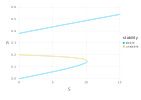

In [5]:
df = DataFrame()
for S = 0:0.1:15
    R0 =  fzeros(R->f(R,S),0.0,1.0)
    df = vcat(df,DataFrame(S=S*ones(R0),R=R0,
    stability=steady(R->f(R,S),R0)))
end
plot(df,x=:S,y=:R,color=:stability,Theme(default_point_size=0.5mm))